In [56]:
import numpy as np
import time
import matplotlib.pyplot as plt
from pylab import figure, plot, show, savefig
import matplotlib.pyplot as plt
import sys
import os.path
from finite_T_min_init import *
from model_parameters import *
import pickle
plt.rcParams.update({'font.size': 15})

In [41]:
phys_params = give_parameters()
phys_params['target particle real space density n_0'] = 0.3
q = 0.0

extra_param = setting_up_grids__and_k_vect_len(phys_params)
phys_params.update(extra_param)

cs = cosine(phys_params["k-grid"])

attract_potential = Coulomb_modified(phys_params) 
phys_params["cosine"] = cs
phys_params["Coulomb interaction in real space"] = attract_potential

k = phys_params["k-grid"]
zero_ind = phys_params['zero momentum index']
num_of_vars = phys_params['number of variables']

In [42]:
En_normal = lambda var_s: vMFFE_normal(var_s, phys_params, q)
E_coh = lambda var_s: vMFFE(var_s, phys_params, q)

In [44]:
temp_array_high = np.linspace(1.0, 0.1, 37)

In [45]:
low_tem_array = np.logspace(-1, -2.5, 21)[1:] 

In [46]:
full_temp_array = np.append(temp_array_high, low_tem_array)

In [47]:
# for minimization
other = { 'Is coherent?' : True, 'number of minimization repetitons' : 10, 'q-vector' : q }

# zero arrays for norm results
E_norm = np.zeros([len(full_temp_array)])
Solut_norm = np.zeros([len(full_temp_array), num_of_vars])

# zero arrays for coh results, no memory
E_no_mem = np.zeros([len(full_temp_array)])
Solut_no_mem = np.zeros([len(full_temp_array), num_of_vars])

# zero arrays for coh results, with memory, isotr
E_mem_isotr = np.zeros([len(full_temp_array)])
Solut_mem_isotr = np.zeros([len(full_temp_array), num_of_vars])

# zero arrays for coh results, with memory, anisotropic
E_mem_ANisotr = np.zeros([len(full_temp_array)])
Solut_mem_ANisotr = np.zeros([len(full_temp_array), num_of_vars])

In [48]:
flag_coh = True
extra_flag_coh = False

flag_anisotr = True
extra_flag_anisotr = False

In [49]:
# reducing temperature
for i in range(len(full_temp_array)):

    start_time = time.time()
    
    phys_params['temperature'] = full_temp_array[i]
    x_normal = initial_conditions_normal(phys_params, q)  
    
    # normal results
    E_norm[i] = En_normal(x_normal)
    Solut_norm[i,:] = x_normal
    
    print('found normal, start coherent')
    
    # calc-s without memory
    init_coh = initial_conditions_coherent(phys_params, q, x_normal)
    result_coh = get_new_minimum(init_coh, phys_params, other)
    E_no_mem[i] = result_coh[0]
    Solut_no_mem[i,:] = result_coh[1]
    aux_coh = el_hole_dens_and_coherence(result_coh[1], phys_params, q)    
    coh_NM = abs(aux_coh['coherence']) 
    anisotr_param_NM = aux_coh['anisotropy parameter']
    
    print('finished coh without mem \n')
    
    # calcs with mem, ISOTROPIC
    if np.einsum('ij ->', abs(coh_NM)) / len(k)**2 > 0.02 or extra_flag_coh:
        if flag_coh:
            print('do isotropic calcs with mem for the first time')
            initial_WM_ISOTR = result_coh[1]
        else:
            print('do isotropic calcs with mem NOT for the first time')
            initial_WM_ISOTR = result_coh_WM_IS[1]
        print('starting isotropic calcs with mem')
        result_coh_WM_IS = get_new_minimum(initial_WM_ISOTR, phys_params, other)
        E_mem_isotr[i] = result_coh_WM_IS[0]
        Solut_mem_isotr[i,:] = result_coh_WM_IS[1]
        flag_coh = False
        extra_flag_coh = True
        
        print('finished isotropic calcs with mem \n')
        
        
    # calcs with mem, ANISOTROPIC
    if (extra_flag_coh and abs(anisotr_param_NM) > 0.01) or extra_flag_anisotr:
        if flag_anisotr:
            print('do ANisotropic calcs with mem for the first time')
            initial_WM_ANISOTR = result_coh[1]
        else:
            print('do ANisotropic calcs with mem NOT for the first time')
            initial_WM_ANISOTR = result_coh_WM_ANIS[1]
        print('starting ANisotropic calcs with mem')
        result_coh_WM_ANIS = get_new_minimum(initial_WM_ANISOTR, phys_params, other)
        E_mem_ANisotr[i] = result_coh_WM_ANIS[0]
        Solut_mem_ANisotr[i,:] = result_coh_WM_ANIS[1]

        flag_anisotr = False
        extra_flag_anisotr = True
        
        print('finished ANisotropic calcs with mem \n')
    
    
    
    print('step ' + str(i+1) + ' out of ' + str(len(full_temp_array)) )
    print("--- %s seconds ---" % (time.time() - start_time) + '\n \n \n')  

found normal, start coherent
finished coh without mem 

step 0 out of 57
--- 431.23040223121643 seconds ---
 
 

found normal, start coherent
finished coh without mem 

step 1 out of 57
--- 399.42681908607483 seconds ---
 
 

found normal, start coherent
finished coh without mem 

step 2 out of 57
--- 399.258318901062 seconds ---
 
 

found normal, start coherent
finished coh without mem 

step 3 out of 57
--- 397.62007689476013 seconds ---
 
 

found normal, start coherent
finished coh without mem 

step 4 out of 57
--- 399.4260232448578 seconds ---
 
 

found normal, start coherent
finished coh without mem 

step 5 out of 57
--- 398.1185781955719 seconds ---
 
 

found normal, start coherent
finished coh without mem 

step 6 out of 57
--- 401.2397429943085 seconds ---
 
 

found normal, start coherent
finished coh without mem 

step 7 out of 57
--- 401.05011320114136 seconds ---
 
 

found normal, start coherent
finished coh without mem 

step 8 out of 57
--- 400.20932507514954 secon

found normal, start coherent
finished coh without mem 

do isotropic calcs with mem NOT for the first time
starting isotropic calcs with mem
finished isotropic calcs with mem 

do ANisotropic calcs with mem NOT for the first time
starting ANisotropic calcs with mem
finished ANisotropic calcs with mem 

step 43 out of 57
--- 700.9319937229156 seconds ---
 
 

found normal, start coherent
finished coh without mem 

do isotropic calcs with mem NOT for the first time
starting isotropic calcs with mem
finished isotropic calcs with mem 

do ANisotropic calcs with mem NOT for the first time
starting ANisotropic calcs with mem
finished ANisotropic calcs with mem 

step 44 out of 57
--- 838.6660668849945 seconds ---
 
 

found normal, start coherent
finished coh without mem 

do isotropic calcs with mem NOT for the first time
starting isotropic calcs with mem
finished isotropic calcs with mem 

do ANisotropic calcs with mem NOT for the first time
starting ANisotropic calcs with mem
finished ANi

## Choose lowest energy solutions

In [52]:
Energy = np.zeros([len(full_temp_array)])
solution = np.zeros([len(full_temp_array), num_of_vars])

for i in range(len(full_temp_array)):
    
    all_en  = np.array([E_norm[i], E_no_mem[i], E_mem_isotr[i], E_mem_ANisotr[i]])
    all_sol = np.array([Solut_norm[i,:], Solut_no_mem[i,:], Solut_mem_isotr[i,:], Solut_mem_ANisotr[i,:]])
    
    for j in range(len(all_en)):
        mask = np.ones(len(all_en)) > 0
        mask[j] = False
        if all_en[j] <= min(all_en[mask]):
            Energy[i] = all_en[j]
            solution[i,:] = all_sol[j]
            break

## Save data

In [58]:
# directory = 'results/temp_depend/'
# if not os.path.exists(directory):
#     os.makedirs(directory)

# with open(directory + 'Energy', 'wb') as handle:
#     pickle.dump(Energy, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open(directory + 'Solution', 'wb') as handle:
#     pickle.dump(solution, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open(directory + 'phys_params', 'wb') as handle:
#     pickle.dump(phys_params, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open(directory + 'Temp_array', 'wb') as handle:
#     pickle.dump(full_temp_array, handle, protocol=pickle.HIGHEST_PROTOCOL)    


## Upload data

In [59]:
# with open('results/temp_depend/Solution', 'rb') as handle:
#     solution = pickle.load(handle)

# with open('results/temp_depend/phys_params', 'rb') as handle:
#     phys_params = pickle.load(handle)

# with open('results/temp_depend/Temp_array', 'rb') as handle:
#     Temperature = pickle.load(handle)

## Process data

In [61]:
# # get expectations
# el_dens = np.zeros([len(Temperature), len(k), len(k)])
# hole_dens = np.zeros([len(Temperature), len(k), len(k)])
# coherence = np.zeros([len(Temperature), len(k), len(k)])
# gap = np.zeros([len(Temperature), len(k), len(k)])
# ne_minus_nh = np.zeros([len(Temperature)])
# ne_plus_nh = np.zeros([len(Temperature)])
# phot_tot = np.zeros([len(Temperature)])
# anisotr = np.zeros([len(Temperature)])

# for i in range(len(Temperature)):

#     phys_params['temperature'] = Temperature[i]
    
#     aux = el_hole_dens_and_coherence(solution[i,:], phys_params, q)
    
#     el_dens[i,:,:] = aux['electron density']
#     hole_dens[i,:,:] = aux['hole density']
#     coherence[i,:,:] = aux['coherence']
#     gap[i,:,:] = aux['gap function']
#     ne_minus_nh[i] = aux['eh real space density difference']
#     ne_plus_nh[i] = aux['Ne plus Nh']
#     phot_tot[i] = aux['phi squared']
#     anisotr[i] = aux['anisotropy parameter']

## Plot results

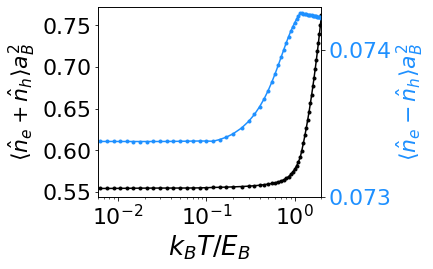

In [62]:
ft = 22

fig, ax1 = plt.subplots(figsize=(4.0, 3.5))

plt.yticks(fontsize = ft, rotation=0)
plt.xticks(fontsize = ft, rotation=0)


ax2 = ax1.twinx()
ax1.set_xlim(0.006, 2.0) 
ax1.semilogx(full_temp_array*2,ne_plus_nh/4, marker = '.', color = 'k')
#ax1.set_ylim(0, ) 
from pylab import MaxNLocator
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_yticks(np.arange(0.55, 0.8, 0.05))


ax2.semilogx(full_temp_array*2, ne_minus_nh/4, marker = '.', color = 'dodgerblue')
#ax2.set_ylim(0, ) 

import matplotlib.ticker
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax1.xaxis.set_minor_locator(locmin)
ax1.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
plt.xticks((1e-2, 1e-1, 1.0), fontsize = ft)

#x = [0.0, 1.2]
#plt.xticks(np.arange(min(x), max(x)+0.1, 0.3)  )

#y = [0.0, 1.1]
#plt.yticks(np.arange(min(y), max(y), 0.2), color = 'dodgerblue')

plt.tick_params(axis='both', which='major', labelsize = ft)
plt.rcParams['font.size'] = ft


ax1.set_xlabel('$k_B T / E_B$', fontsize = ft+4)
ax1.set_ylabel('$\\langle \hat{n}_e + \hat{n}_h \\rangle a_B^2$', fontsize = ft)
ax2.set_ylabel('$\\langle \hat{n}_e - \hat{n}_h \\rangle a_B^2$', color = 'dodgerblue', fontsize = ft)
plt.yticks([0.073, 0.074], color = 'dodgerblue', fontsize = ft)

        
#plt.savefig('F_and_nc_vs_T.pdf', bbox_inches='tight', transparent=True)

plt.show()



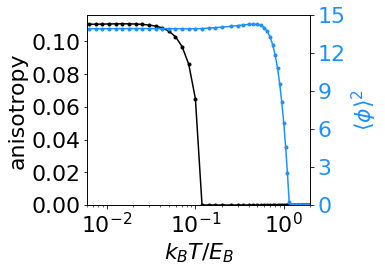

In [71]:
ft = 22


fig, ax1 = plt.subplots(figsize=(4.0, 3.5))

plt.yticks(fontsize = ft, rotation=0)
plt.xticks(fontsize = ft, rotation=0)


ax2 = ax1.twinx()
ax1.set_xlim(0.006, 2.0) 
ax1.semilogx(full_temp_array*2, abs(anisotr), marker = '.', color = 'k')
ax1.set_ylim(0, ) 
from pylab import MaxNLocator
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_yticks([0.0, 0.02, 0.04, 0.06, 0.08, 0.1])


ax2.semilogx(full_temp_array*2, phot_tot, marker = '.', color = 'dodgerblue')
ax2.set_ylim(0, ) 

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax1.xaxis.set_minor_locator(locmin)
ax1.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
plt.xticks((1e-2, 1e-1, 1.0), fontsize = ft)


ax1.set_xlabel('$k_B T / E_B$', fontsize = ft)
ax1.set_ylabel('anisotropy', fontsize = ft)
#ax2.set_ylabel('$\\langle \phi \\rangle^2 / N_{tot}$', color = 'dodgerblue', fontsize = ft)
ax2.set_ylabel('$\\langle \phi \\rangle^2$', color = 'dodgerblue', fontsize = ft)
plt.yticks(np.arange(0, 16, 3), color = 'dodgerblue', fontsize = ft)

        

#plt.savefig('anis_phot_vs_n0__alpha_100.svg', bbox_inches='tight', transparent=True)

plt.show()



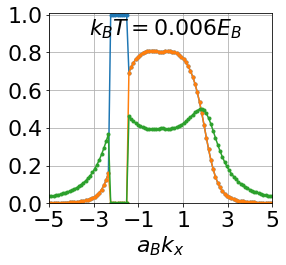

In [68]:
fig, ax = plt.subplots(figsize=(4.0, 3.5))


plt.plot(k/2, el_dens[i, zero_ind, :], marker = '.', label = '$N_e(k)$ ')
plt.plot(k/2, hole_dens[i, zero_ind, :], marker = '.', label = '$N_h(k)$' )
plt.plot(k/2, abs(coherence[i, zero_ind, :]), marker = '.', label = 'C(k)')


plt.xlim(-5, 5)
plt.ylim(0, 1.01)

#plt.legend(fontsize = ft, loc = (0.3, 0.01), framealpha = 0.8)
plt.xticks(fontsize=ft, rotation=0)
plt.yticks(fontsize=ft, rotation=0)

plt.title('$k_B T = $' + str(np.round(2*full_temp_array[i],3)) + '$E_B$', y = 0.85, x = 0.52, fontsize = ft )
#plt.text(-4.8, 0.86,'(f)' , fontsize = ft )
#plt.text(6.3, 0.85,'(IV)' , fontsize = ft )


x = [-5, 5]
y = [-0.0, 1.01]
plt.xticks(np.arange(min(x), max(x)+0.1, 2)   )
plt.yticks(np.arange(min(y), max(y), 0.2)   )
plt.grid()


plt.xlabel('$a_B k_x$', fontsize = ft)
#plt.savefig('dens.svg', bbox_inches='tight', transparent=True)

plt.show()


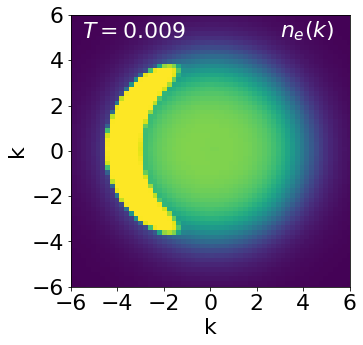

In [69]:
y, x = np.meshgrid(k, k)

i = -7

plt.figure( figsize=(5, 5) ) 
#plt.pcolormesh(y, x, el_dens_coh_NM[i,:,:], vmin = 0.0, vmax = 1.0 )#, cmap=plt.cm.jet)
plt.pcolormesh(y, x, el_dens[i,:,:], vmin = 0.0, vmax = 1.0 )#, cmap=plt.cm.jet)
#plt.colorbar()
plt.xlim(-6, 6)
plt.ylim(-6, 6)
ax.set_aspect(20)
plt.xticks(fontsize=ft, rotation=0)
plt.yticks(fontsize=ft, rotation=0)

plt.text(-5.5, 5.0, '$T = $' + str(np.round(full_temp_array[i],3)), color = 'w', fontsize = 22)
plt.text(3.0, 5.0, '$n_e(k)$', color = 'w', fontsize = 22)


plt.xlabel('k', size=ft)
plt.ylabel('k', size=ft)

plt.xticks(np.arange(-6, 6.01, 2)  )
plt.yticks(np.arange(-6, 6.01, 2)  )


#plt.savefig('el_dens_coh.pdf', bbox_inches='tight', transparent=True)

plt.show()